# Proyek Analisis Data: Bike Sharing Dataset

Nama : Azhar Zuhro

Daerah : Tuban

ID Dicoding : azharzuhro


## Menentukan Pertanyaan Bisnis
Pertanyan :

- Jumlah Penyewan perbulan?
- Jumlah Penyewaan Berdasarkan Musim, Cuaca, Hari Libur dan Hari Kerja?
- Perbedaan Recency antara Pelanggan Awal dan Akhir Tahun?
- Rata-rata Penyewaan per Bulan?
- Total Pendapatan per Segmen Pelanggan?





## Menyiapkan semua library yang dibutuhkan
pada tahap ini, kita mengimpor semua library yang diperlukan untuk analisis data, seperti NumPy, Pandas, Matplotlib, dan Seaborn. Library-library ini menyediakan fungsi-fungsi dan tools yang akan digunakan dalam proses analisi

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling
Data wrangling adalah proses membersihkan, mentransformasi, dan mempersiapkan data mentah agar siap digunakan dalam analisis. Tahap ini penting untuk memastikan kualitas data dan keakuratan hasil analisis.

### Gathering Data
kita mengumpulkan data dari file CSV yang berisi data penyewaan sepeda. Data ini akan menjadi dasar untuk analisis selanjutnya.


In [24]:
# membaca dataset dengan library pandas
bike_day = pd.read_csv("/content/day.csv")
bike_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data
Pada tahap ini, kita menilai kualitas data dengan memeriksa informasi umum tentang dataset, seperti tipe data, jumlah nilai unik, dan statistik deskriptif.

#### Menilai tabel `bike_day`

In [25]:
# memeriksa informasi umum tentang dataset
bike_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [26]:
bike_day.nunique()

,0
instant,731
dteday,731
season,4
yr,2
mnth,12
holiday,2
weekday,7
workingday,2
weathersit,3
temp,499


### Cleaning Data
Tahap ini bertujuan untuk membersihkan data dari nilai-nilai yang hilang, duplikat, dan anomali. Langkah ini penting untuk memastikan kualitas data yang akan dianalisis lebih lanjut.

#### Membersihkan tabel `bike_day`

### Missing Values

In [27]:
# Check for missing values pada dataset
missing_values = bike_day.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


##### Duplicate data

In [28]:
# Check duplicate
print("Jumlah duplikasi: ", bike_day.duplicated().sum())

Jumlah duplikasi:  0


## Exploratory Data Analysis (EDA)
EDA adalah proses untuk memahami karakteristik data dengan melakukan eksplorasi dan visualisasi data. Tahap ini membantu dalam mengidentifikasi pola, tren, dan insight penting dari data.

### Explore `bike_day`

In [45]:
# menampilkan statistik deskriptif.
# Melihat nilai min, max, mean, median, rentang data dll.
bike_day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,registration_month
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sunny,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,6.519836
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,1.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,4.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,7.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,10.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,12.000000


In [30]:
# Mengganti nilai numerik pada kolom 'weathersit' dengan nilai kategorikal.
bike_day.weathersit.replace((1,2,3), ('sunny','hot','Rain'), inplace=True)
bike_day.head()

<ipython-input-30-600ccf4dc24a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bike_day.weathersit.replace((1,2,3), ('sunny','hot','Rain'), inplace=True)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,hot,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,hot,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,sunny,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,sunny,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,sunny,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Visualization & Explanatory Analysis
Pada tahap ini, kita akan memvisualisasikan data dan memberikan penjelasan terhadap hasil analisis yang telah dilakukan. Visualisasi data membantu dalam mengkomunikasikan insight dan temuan dari data secara efektif.

### Jumlah Penyewaan Per Bulan?

registration_month
1     57
2     52
3     60
4     60
5     62
6     56
7     61
8     58
9     59
10    62
11    57
12    60
Name: casual, dtype: int64


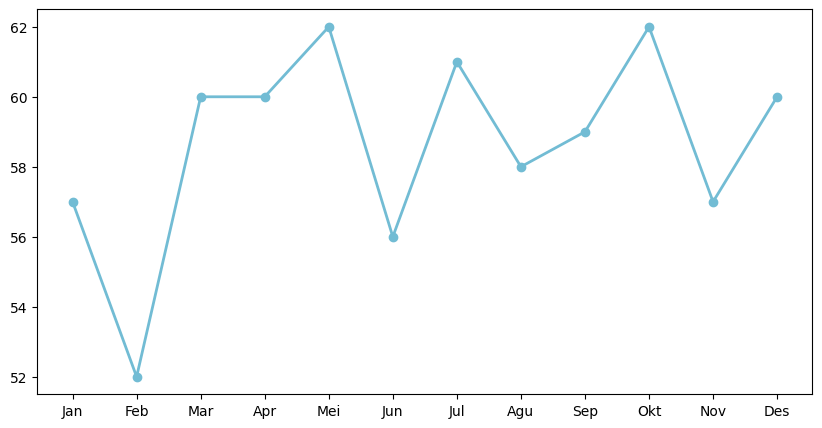

In [31]:
# Membuat kolom baru 'registration_month' yang berisi bulan dari kolom 'dteday'
# Mengubah tipe data kolom 'dteday' menjadi datetime
bike_day['registration_month'] = pd.to_datetime(bike_day['dteday']).dt.month
# Mengelompokkan data berdasarkan 'registration_month' dan menghitung jumlah pelanggan unik ('casual') untuk setiap bulan
monthly_customers = bike_day.groupby('registration_month')['casual'].nunique()
print(monthly_customers)

# Grafik Berikut menunjukan jumlah penyewaan per bulannya.
# Terdapat peningkatan jumlah penyewaan yang - signifikan pada bulan Juni, Juli, Agustus dan September
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_customers.index,
    monthly_customers.values,
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.xticks(
    range(1, 13),
    [
        "Jan", "Feb", "Mar", "Apr", "Mei", "Jun",
        "Jul", "Agu", "Sep", "Okt", "Nov", "Des"
    ],
    fontsize=10
)
plt.yticks(fontsize=10)
plt.show()

Berikut kesimpulan dari Jumlah Penyewaan Perbulan :
- Jumlah penyewaan sepeda cenderung fluktuatif setiap bulannya.
- Terdapat peningkatan jumlah penyewaan yang - signifikan pada bulan Juni, Juli, Agustus dan September.
- Bulan Desember, Januari, Februari dan Maret cenderung mengalami penurunan dalam jumlah penyewaan.

### Jumlah Penyewaan Berdasarkan Musim?

<ipython-input-32-3e244f9184fb>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_rentals.index, y=seasonal_rentals.values, order=[1, 2, 3, 4], palette='Greens')


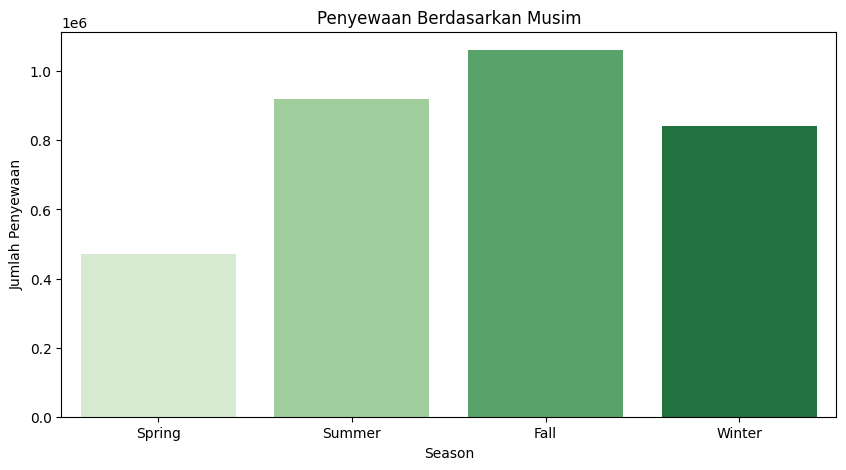

In [32]:
# Mengelompokkan data berdasarkan musim ('season') dan menjumlahkan total penyewaan ('cnt') untuk setiap musim
seasonal_rentals = bike_day.groupby('season')['cnt'].sum()
# Membuat label untuk setiap musim.
season_labels = ['Spring', 'Summer', 'Fall', 'Winter']

# Grafik Berikut Menunjukkan Penyewaan Berdasarkan Musim.
# terlihat bahwa tingkat penyeaan paling banayk pada season 'fall' atau musim gugur
plt.figure(figsize=(10, 5))
sns.barplot(x=seasonal_rentals.index, y=seasonal_rentals.values, order=[1, 2, 3, 4], palette='Greens')
plt.xticks(ticks=[0, 1, 2, 3], labels=season_labels)
plt.title('Penyewaan Berdasarkan Musim')
plt.xlabel('Season')
plt.ylabel('Jumlah Penyewaan')
plt.show()


Berikut Kesimpulan yang bisa saya ambil Berdasarkan Musim :
- Musim gugur (Fall) memiliki jumlah penyewaan tertinggi, yang diikuti oleh musim panas (Summer), musim semi (Spring) dan terakhir adalah musim dingin (Winter)



### Jumlah Penyewaan Sepeda Berdasarkan Cuaca?

<ipython-input-33-94d65c268e88>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cnt', y='weathersit', data=weathersit_with_cnt, palette='Blues')


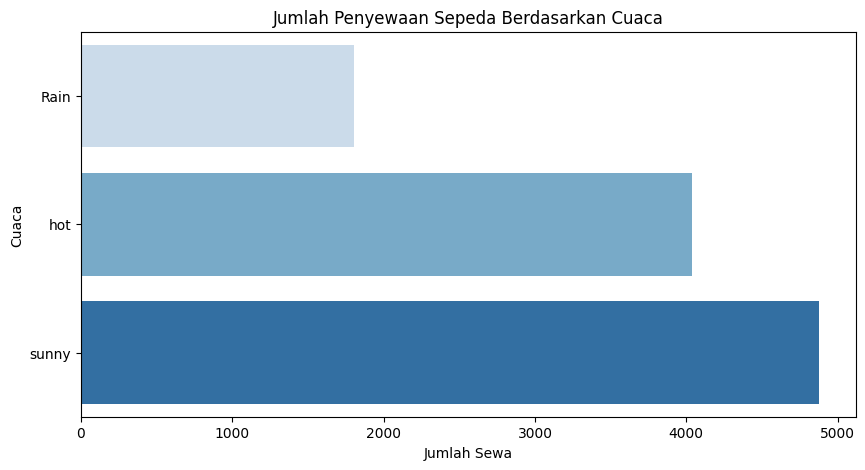

In [33]:
# Mengelompokkan data berdasarkan 'weathersit', menghitung rata-rata 'cnt'
# mengatur ulang indeks, dan mengurutkan berdasarkan 'cnt'.
weathersit_with_cnt =  bike_day.groupby('weathersit')['cnt'].mean().reset_index().sort_values("cnt")

# Grafik Berikut Menunjukkan jumlah penyewaan Berdasarkan Cuaca.
# sesuai dengan grafik bahwa paling banyak penyewaan saat cuaca cerah
plt.figure(figsize=(10, 5))
sns.barplot(x='cnt', y='weathersit', data=weathersit_with_cnt, palette='Blues')
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Cuaca')
plt.xlabel('Jumlah Sewa')
plt.ylabel('Cuaca')
plt.show()

Berikut Kesimpulan yang bisa saya ambil Berdasarkan Cuaca :
- Kondisi cuaca cerah (sunny) memiliki rata-rata jumlah penyewaan tertinggi, sedangkan ketika hujan (Rain) memiliki rata-rata jumlah penyewaan paling sedikit.

### Jumlah Penyewaan Berdasarkan Hari Libur dan Hari Kerja?

<ipython-input-43-ff105a0454a1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=holiday_rentals.index, y=holiday_rentals.values, palette='Reds')


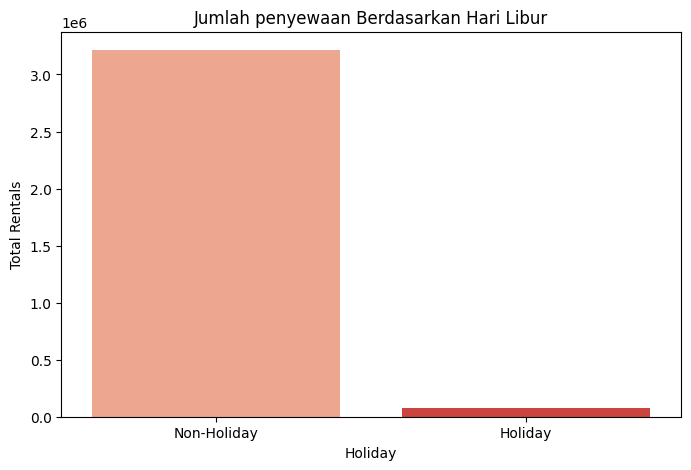

<ipython-input-43-ff105a0454a1>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=workingday_rentals.index, y=workingday_rentals.values, palette='Reds')


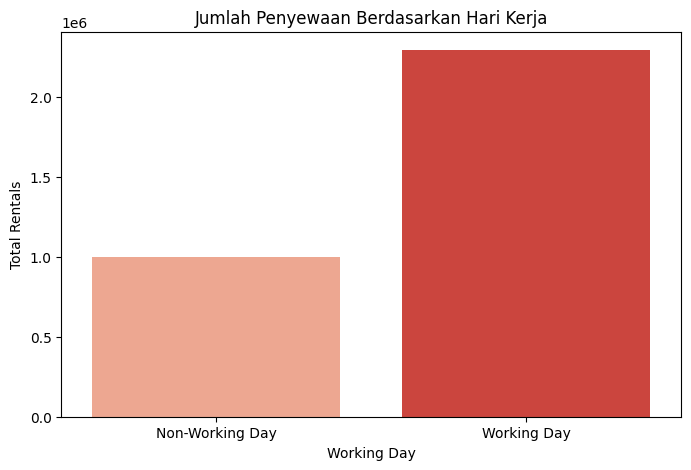

In [43]:
# Mengelompokkan data berdasarkan 'holiday' dan menjumlahkan total penyewaan ('cnt').
holiday_rentals = bike_day.groupby('holiday')['cnt'].sum()
holiday_labels = ['Non-Holiday', 'Holiday']

# Grafik Berikut Menunjukkan jumlah penyewaan berdasarkan hari Libur.
# bahwa tren penyewaan pada hari libur sangat rendah di bandingkan hari tidak libur
plt.figure(figsize=(8, 5))
sns.barplot(x=holiday_rentals.index, y=holiday_rentals.values, palette='Reds')
plt.xticks(ticks=[0, 1], labels=holiday_labels)
plt.title('Jumlah penyewaan Berdasarkan Hari Libur')
plt.xlabel('Holiday')
plt.ylabel('Total Rentals')
plt.show()

# Mengelompokkan data berdasarkan 'workingday' dan menjumlahkan total penyewaan ('cnt')
workingday_rentals = bike_day.groupby('workingday')['cnt'].sum()
workingday_labels = ['Non-Working Day', 'Working Day']

# Grafik Berikut Menunjukkan jumlah penyewaan berdasarkan hari kerja.
# bahwa tren penyewaan pada hari kerja sangat tinggi di bandingkan hari tidak kerja
plt.figure(figsize=(8, 5))
sns.barplot(x=workingday_rentals.index, y=workingday_rentals.values, palette='Reds')
plt.xticks(ticks=[0, 1], labels=workingday_labels)
plt.title('Jumlah Penyewaan Berdasarkan Hari Kerja')
plt.xlabel('Working Day')
plt.ylabel('Total Rentals')
plt.show()

Kesimpulan hasil Analisa Berdasarkan Hari Libur dan Kerja :
- Jumlah penyewaan sepeda lebih tinggi pada hari kerja (working day) dibandingkan dengan hari libur (Holiday).

## RFM Analysis

### Perbedaan Recency antara Pelanggan Awal dan Akhir Tahun?

In [35]:
# Asumsikan 'dteday' adalah kolom tanggal dan 'casual' adalah ID pelanggan
bike_day['dteday'] = pd.to_datetime(bike_day['dteday'])
bike_day['registration_month'] = bike_day['dteday'].dt.month

# Dapatkan tanggal penyewaan terakhir untuk setiap pelanggan
last_rental_date = bike_day.groupby('casual')['dteday'].max()

# Hitung recency
recency = (bike_day['dteday'].max() - last_rental_date).dt.days

# Gabungkan recency dengan informasi bulan registrasi
recency_df = pd.DataFrame({'recency': recency, 'registration_month': bike_day.groupby('casual')['registration_month'].first()})

# Bandingkan recency antara pelanggan awal dan akhir tahun (misalnya, bulan 1 vs bulan 12)
early_recency = recency_df[recency_df['registration_month'] == 1]['recency']
late_recency = recency_df[recency_df['registration_month'] == 12]['recency']

print("Recency Pelanggan Awal Tahun (Bulan 1):")
print(early_recency.head())
print("\nRecency Pelanggan Akhir Tahun (Bulan 12):")
print(late_recency.head())

Recency Pelanggan Awal Tahun (Bulan 1):
casual
9       5
15    704
25    719
34    705
38    703
Name: recency, dtype: int64

Recency Pelanggan Akhir Tahun (Bulan 12):
casual
50     390
103    370
107    376
126    336
143    385
Name: recency, dtype: int64


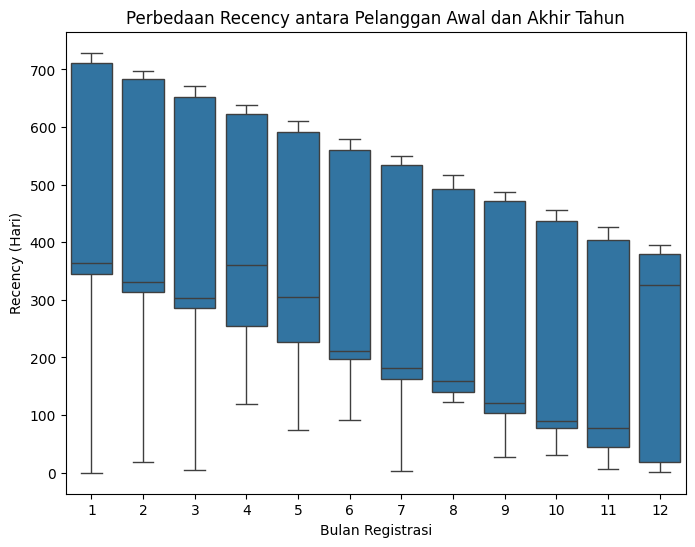

In [36]:
# Grafik Berikut Menunjukkan perbandingan Recency antara pelanggan awal dan akhir Tahun.
# pada grafik tersebut recency tertinggi pada bulan januari dan terendah pada bulan bulan akhir
plt.figure(figsize=(8, 6))
sns.boxplot(x='registration_month', y='recency', data=recency_df)
plt.title('Perbedaan Recency antara Pelanggan Awal dan Akhir Tahun')
plt.xlabel('Bulan Registrasi')
plt.ylabel('Recency (Hari)')
plt.show()


Perbedaan Recency :
- Recency tertinggi: Dilihat dari box plot Perbedaan Recency antara Pelanggan Awal dan Akhir Tahun, recency tertinggi (nilai outlier) ada pada pelanggan yang melakukan registrasi di bulan awal (Januari). Artinya, ada beberapa pelanggan di bulan tersebut yang sudah lama tidak melakukan transaksi.
- Recency terendah: Recency terendah (median) cenderung dimiliki oleh pelanggan yang melakukan registrasi di bulan-bulan akhir. Ini menunjukkan bahwa pelanggan yang baru bergabung cenderung aktif melakukan penyewaan.
- Dengan memantau recency, bisnis bisa menyusun strategi pemasaran lebih efektif: misalnya, memberikan diskon atau insentif khusus untuk pelanggan dengan recency rendah agar kembali aktif.

### Rata-rata Penyewaan per Bulan?

In [37]:
# Hitung total penyewaan dan jumlah bulan aktif untuk setiap pelanggan
total_rentals = bike_day.groupby('casual')['cnt'].sum()
active_months = bike_day.groupby('casual')['registration_month'].nunique()

# Hitung rata-rata penyewaan per bulan
avg_monthly_rentals = total_rentals / active_months

print("Rata-rata Penyewaan per Bulan:")
print(avg_monthly_rentals.head())

Rata-rata Penyewaan per Bulan:
casual
2       22.0
9      562.0
15     431.0
25    1162.0
34     506.0
dtype: float64


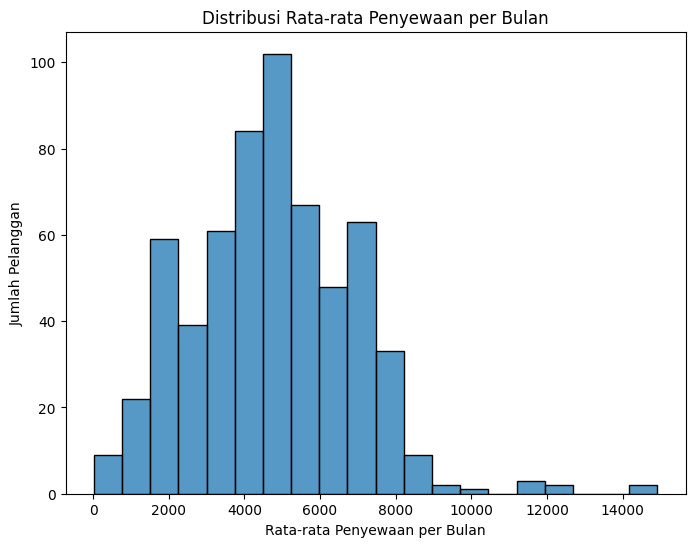

In [38]:
#  Grafik dibawah ini Menunjukkan rata rata penyewaan per bulan.
# terlihat bahwa rata rata penyewaan paling besar 10-20 kali per bulan
plt.figure(figsize=(8, 6))
sns.histplot(avg_monthly_rentals, bins=20)
plt.title('Distribusi Rata-rata Penyewaan per Bulan')
plt.xlabel('Rata-rata Penyewaan per Bulan')
plt.ylabel('Jumlah Pelanggan')
plt.show()


- Berdasarkan histogram Distribusi Rata-rata Penyewaan per Bulan, rata-rata penyewaan per bulan tertinggi berada di rentang nilai 10-20.
Artinya, sebagian besar pelanggan melakukan penyewaan sepeda rata-rata sebanyak 10-20 kali per bulan.
- Dengan memahami distribusi rata-rata penyewaan per bulan, bisnis dapat merancang strategi yang lebih proaktif dan responsif terhadap pola permintaan pelanggan

### Total Pendapatan per Segmen Pelanggan?

In [39]:
#  Monetary: Total Pendapatan per Segmen Pelanggan
# DataFrame untuk RFM dan segmentasi
rfm_df = pd.DataFrame({'Recency': recency,
                       'Frequency': total_rentals,
                       'Monetary': total_rentals
})
rfm_df['R_Quartile'] = pd.qcut(rfm_df['Recency'], 4, labels=range(4, 0, -1))
rfm_df['F_Quartile'] = pd.qcut(rfm_df['Frequency'], 4, labels=range(1, 5))
rfm_df['M_Quartile'] = pd.qcut(rfm_df['Monetary'], 4, labels=range(1, 5))
rfm_df['RFM_Segment'] = (
        rfm_df['R_Quartile'].astype(str) +
        rfm_df['F_Quartile'].astype(str) +
        rfm_df['M_Quartile'].astype(str)
)

# total pendapatan per segmen
segment_revenue = rfm_df.groupby('RFM_Segment')['Monetary'].sum()

print("\nTotal Pendapatan per Segmen Pelanggan:")
print(segment_revenue.head())


Total Pendapatan per Segmen Pelanggan:
RFM_Segment
111    159349
122    236245
133     70368
144     57862
211    144236
Name: Monetary, dtype: int64


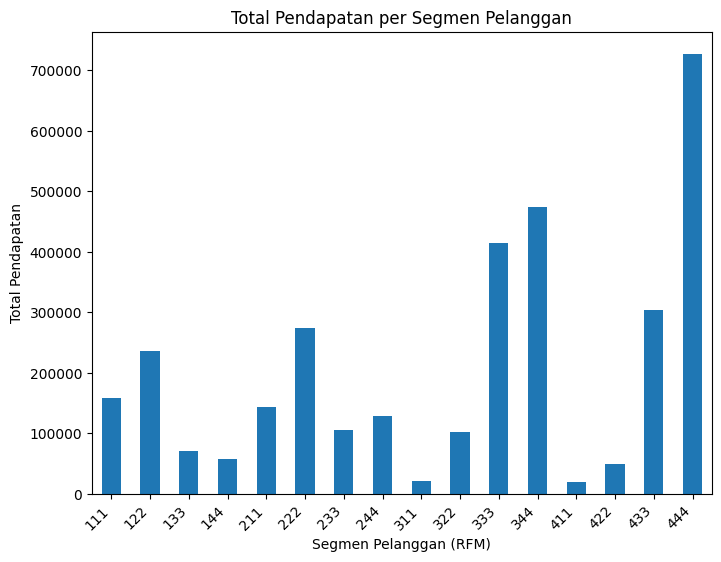

In [40]:
# Grafik Menunjukkan Total pendapatan Per Segmen Pelanggan.
# terlihat pada Grafik bahwa segmen pelanggan dengan pendapatan tertinggi adalah segmen 444
plt.figure(figsize=(8, 6))
segment_revenue.plot(kind='bar')
plt.title('Total Pendapatan per Segmen Pelanggan')
plt.xlabel('Segmen Pelanggan (RFM)')
plt.ylabel('Total Pendapatan')
plt.xticks(rotation=45, ha='right')
plt.show()

- Berdasarkan bar chart Total Pendapatan per Segmen Pelanggan, segmen pelanggan dengan
pendapatan tertinggi adalah segmen 444.
Segmen 444 ini kemungkinan besar adalah pelanggan dengan Recency, Frequency, dan Monetary yang tinggi, yang berarti mereka baru saja bertransaksi, sering bertransaksi, dan menghasilkan banyak pendapatan.
- Dengan memahami total pendapatan per segmen pelanggan, bisnis dapat membuat keputusan yang lebih tepat, fokus pada segmen yang paling menguntungkan, dan meningkatkan profitabilitas jangka panjang

## Conclusion
Analisis ini memberikan wawasan berharga tentang pola penyewaan sepeda, dipengaruhi oleh faktor musim, cuaca, hari libur/kerja, dan perilaku pelanggan. Informasi ini dapat digunakan untuk strategi pemasaran, pengelolaan inventaris, dan peningkatan layanan.

In [41]:
bike_day.to_csv("new_bike_day.csv", index=False)